# Importing PDF and Excel data, creating base dataframe and cleaning data

Start by importing the following libraries which we are going to use to load the data, clean it up and do some exploratory data analysis before we run the classification algorithms:

- Python Pandas: to load and manage tabular data.
- Tabula: to load data from a table stored in a .pdf file.
- MatplotLib: to visualise data durin the exploratory data analysis
- Numpy: to perform mathematical operations with the data set.



In [1]:
import pandas as pd
!pip install tabula-py # since tabula-py library is not installed by default on Google colab servers
import tabula
import matplotlib.pyplot as plt
import numpy as np

     |████████████████████████████████| 12.0 MB 3.7 MB/s 


Load the data from the PDF file and save it to a csv file. Then load the newly created csv file and store it as a Pandas dataframe.

In [2]:
# output the tables in the PDF to a CSV

tabula.convert_into("/content/Loans_Database_Table.pdf", "loans_db_table.csv", pages = 'all')

In [3]:
# load loans table that was previously in a pdf from a csv file

df = pd.read_csv("/content/loans_db_table.csv")

Check that the dataframe has been created correctly and check the size of it.

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


In [5]:
df.shape

(398, 13)

Load the second dataset provided from an excel file and store it in separate dataframe. Check the size of both dataframes.

In [6]:
# load the extra loan data in xlsx format using pd.read_excel

df_2 = pd.read_excel("/content/Zappy Loan Data.xlsx")

In [7]:
df_2.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


In [8]:
print(df.shape)
print(df_2.shape)

(398, 13)
(247, 13)


Create one single dataframe by appending the second dataframe we created (by uploading the excel file) to the first dataframe we created earlier. Check the shape of the resulting dataframe to make sure we aren't missing any data.

In [9]:
# merge the 2 datasets into 1 

df = df.append(df_2)


In [10]:
df.shape

(645, 13)

Start cleaning up the data by looking at null values

In [11]:
# check for null values

df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Continue cleaning up the data by dropping only columns that have all the values duplicated, as opposed to dropping all the rows that have duplicate "loan_id". The author considers that given that some of the data has been collected manually, the fact that there are duplicate "loan_id" IDs with different data values shouldn't make those entries invalid. This allows us to keep more data to feed to the algortihm later on.

In [12]:
# drop duplicates considering all the columns

df = df.drop_duplicates()

As a result of discarding only rows with all values duplicated we drop only 3.

In [13]:
df.shape

(642, 13)

Change the to use the "Loan ID" field

In [14]:
# set loan id as index

df.set_index("Loan_ID", inplace=True)

df.head()


,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


Understand the correlation across all the variables to make sure there's no multicollinearity in the resulting model.

In [15]:
# check correlations across different dimensions

df.corr()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,-0.365518,-0.173172,0.042436,-0.001517,-0.059259,-0.087910,-0.111545,0.078270,-0.028502,-0.021813
Married,-0.365518,1.000000,0.338063,-0.011890,-0.000394,0.049858,0.079341,0.139979,-0.098487,-0.022731,-0.008588
Dependents,-0.173172,0.338063,1.000000,-0.048322,0.060112,0.112463,0.029342,0.143883,-0.107730,-0.021909,-0.017515
Graduate,0.042436,-0.011890,-0.048322,1.000000,-0.000334,0.141421,0.060006,0.151174,0.078029,0.100335,-0.055792
Self_Employed,-0.001517,-0.000394,0.060112,-0.000334,1.000000,0.125902,-0.013016,0.109388,-0.049219,-0.016875,0.025685
ApplicantIncome,-0.059259,0.049858,0.112463,0.141421,0.125902,1.000000,-0.120177,0.549572,-0.051913,0.008373,0.021507
CoapplicantIncome,-0.087910,0.079341,0.029342,0.060006,-0.013016,-0.120177,1.000000,0.172659,-0.059956,-0.058341,-0.011831
LoanAmount,-0.111545,0.139979,0.143883,0.151174,0.109388,0.549572,0.172659,1.000000,0.012471,-0.022315,0.047431
Loan_Amount_Term,0.078270,-0.098487,-0.107730,0.078029,-0.049219,-0.051913,-0.059956,0.012471,1.000000,-0.006870,0.049153
Credit_History,-0.028502,-0.022731,-0.021909,0.100335,-0.016875,0.008373,-0.058341,-0.022315,-0.006870,1.000000,0.019987


Show quick stats on the data set to understand for example if the values of certain variables are much larger than others and need to be normalised before we use them in a classification algorithm. See for example that "ApplicantIncome", "CoapplicantIncome", "LoanAmount" and "Loan_Amount_Term" have much larger mean values than the rest of variables.


In [16]:
# check data in dataframe

df.describe(include="all")

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444
mean,1.182243,0.651090,0.735202,0.783489,0.129283,5370.386293,1609.445047,148.230530,334.439252,0.777259,1.959502,NaN
std,0.386346,0.476997,1.003103,0.412188,0.335775,6035.008001,2872.763920,86.301415,62.817346,0.416411,0.788912,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,NaN
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2875.000000,0.000000,101.250000,333.000000,1.000000,1.000000,NaN
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1221.000000,128.000000,360.000000,1.000000,2.000000,NaN
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5741.000000,2305.000000,168.000000,360.000000,1.000000,3.000000,NaN


Lastly check that each column has the datatypes we would expect.

In [17]:
#check data types in df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 1002 to 2990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             642 non-null    int64  
 1   Married            642 non-null    int64  
 2   Dependents         642 non-null    int64  
 3   Graduate           642 non-null    int64  
 4   Self_Employed      642 non-null    int64  
 5   ApplicantIncome    642 non-null    int64  
 6   CoapplicantIncome  642 non-null    float64
 7   LoanAmount         642 non-null    int64  
 8   Loan_Amount_Term   642 non-null    int64  
 9   Credit_History     642 non-null    int64  
 10  Property_Area      642 non-null    int64  
 11  Loan_Status        642 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 65.2+ KB


# Exploratory Data Analysis

In this section we're going to do some exploratory data analysis to get better acquainted with this particular data set. To help understand the characteristics of this data set we're going to use some visualisations using Python's Matplotlib library.

We start by checking the distribution of values for certain variables, to see for example if there are any outliers that we need to consider.

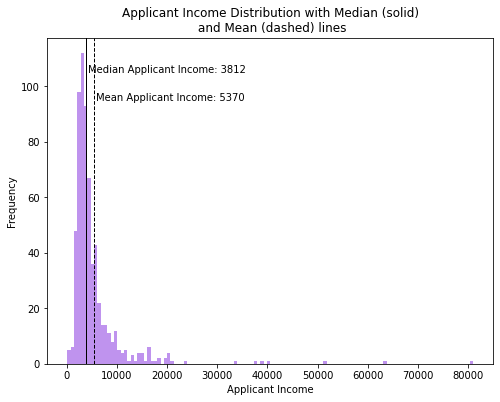

In [30]:
# check basic stats across different features

x = df['ApplicantIncome']

plt.rcParams["figure.figsize"] = (8,6)

result = plt.hist(x, bins='auto', color='#b887ed', alpha=0.9)

plt.axvline(x.mean(), color='k', linestyle='dashed',linewidth=1, label=x.mean)
plt.axvline(x.median(), color='k', linestyle='solid',linewidth=1, label=x.median)
plt.title("Applicant Income Distribution with Median (solid)\n and Mean (dashed) lines")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.text(x.mean()*1.1, 95, 'Mean Applicant Income: {:.0f}'.format(x.mean()))
plt.text(x.median()*1.1, 105, 'Median Applicant Income: {:.0f}'.format(x.median()))
plt.show()

There's a significant difference between the median and mean "Applicant Income" and as we can see from the histogram there are some outliers that are bringing the mean "Applicant Income" higher. Let's see if it is the same with "Coapplicant Income".

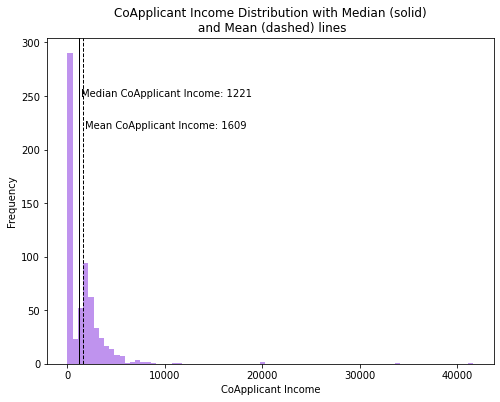

In [31]:
# check basic stats across different features

x = df['CoapplicantIncome']

plt.rcParams["figure.figsize"] = (8,6)

result = plt.hist(x, bins='auto', color='#b887ed', alpha=0.9)

plt.axvline(x.mean(), color='k', linestyle='dashed',linewidth=1, label=x.mean())
plt.axvline(x.median(), color='k', linestyle='solid',linewidth=1, label=x.median())
plt.title("CoApplicant Income Distribution with Median (solid)\n and Mean (dashed) lines")
plt.xlabel("CoApplicant Income")
plt.ylabel("Frequency")
plt.text(x.mean()*1.1, 220, 'Mean CoApplicant Income: {:.0f}'.format(x.mean()))
plt.text(x.median()*1.1, 250, 'Median CoApplicant Income: {:.0f}'.format(x.median()))
plt.show()

"CoApplicant Income" does have some outliers too. If we compare the % difference between mean and median values for "Applicant Income" and "CoApplicant Income" we see that they are quite similar.

In [32]:
# check % difference between Applicant Income and Coapplicant Income "mean" and "median" values

x = df['ApplicantIncome']

y = df['CoapplicantIncome']

x_diff = ((x.mean()/x.median())-1)*100
y_diff = ((y.mean()/y.median())-1)*100

print("The % difference between mean and median Applicant Income is "+str("%.2f%%"%x_diff))
print("The % difference between mean and median Coapplicant Income is "+str("%.2f%%"%y_diff))

The % difference between mean and median Applicant Income is 40.86%
The % difference between mean and median Coapplicant Income is 31.81%


In both cases, the mean is significantly higher than the median.

Let's continue by checking the distribution of "Loan Amount".

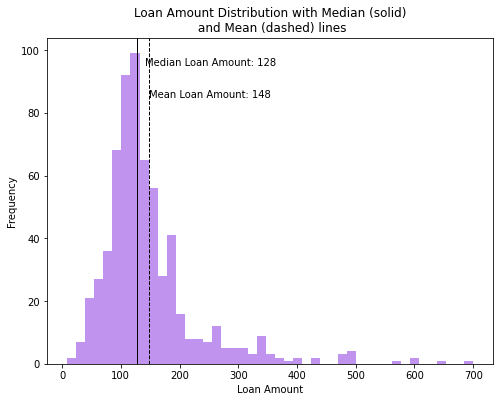

In [33]:
x = df['LoanAmount']

plt.rcParams["figure.figsize"] = (8,6)

result = plt.hist(x, bins='auto', color='#b887ed', alpha=0.9)

plt.axvline(x.mean(), color='k', linestyle='dashed',linewidth=1, label=x.mean())
plt.axvline(x.median(), color='k', linestyle='solid',linewidth=1, label=x.median())
plt.title("Loan Amount Distribution with Median (solid)\n and Mean (dashed) lines")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.text(x.mean()*1, 85, 'Mean Loan Amount: {:.0f}'.format(x.mean()))
plt.text(x.median()*1.1, 95, 'Median Loan Amount: {:.0f}'.format(x.median()))
plt.show()

There are some outliers as well in "Loan Amount" but they are much closer to the median than in the case of "Applicant Income" and "CoApplicant Income".

Next let's check the average loan approval rate to then contextualize the approval rate of some of the other variables in the data set.

In [34]:
# average loan approvals

approved = sum(1 for i in df["Loan_Status"] if i == "Y")
not_approved = sum(1 for i in df["Loan_Status"] if i == "N")

approval_rate = approved/(approved+not_approved)*100
print("Percentage of loan approvals is "+str("%.0f%%"%approval_rate))

Percentage of loan approvals is 69%


Now let's look at more specific data, starting with the "Applicant Income" distribution for self-employed applicants and applicants who are NOT self-employed.

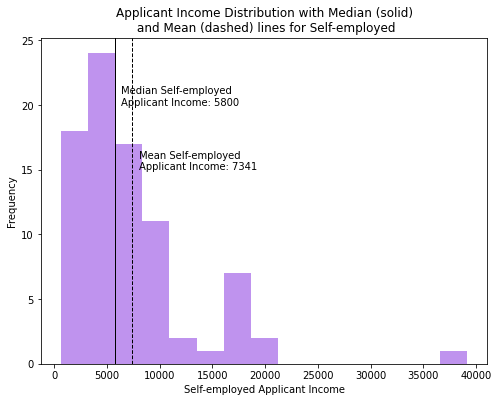

In [35]:
# analysis of income for self-employed applicants

df_self_employed = df.loc[df["Self_Employed"]==1]

x = df_self_employed['ApplicantIncome']

plt.rcParams["figure.figsize"] = (8,6)

result = plt.hist(x, bins='auto', color='#b887ed', alpha=0.9)

plt.axvline(x.mean(), color='k', linestyle='dashed',linewidth=1, label=x.mean())
plt.axvline(x.median(), color='k', linestyle='solid',linewidth=1, label=x.median())
plt.title("Applicant Income Distribution with Median (solid)\n and Mean (dashed) lines for Self-employed")
plt.xlabel("Self-employed Applicant Income")
plt.ylabel("Frequency")
plt.text(x.mean()*1.1, 15, 'Mean Self-employed\nApplicant Income: {:.0f}'.format(x.mean()))
plt.text(x.median()*1.1, 20, 'Median Self-employed\nApplicant Income: {:.0f}'.format(x.median()))
plt.show()

Interestingly, when we filter the data set to look only at self-employed applicants we observe that there aren't too many outliers. So the outliers we've seen before must come from the applicants who are not self-employed. Let's plot a histogram for those to verify.

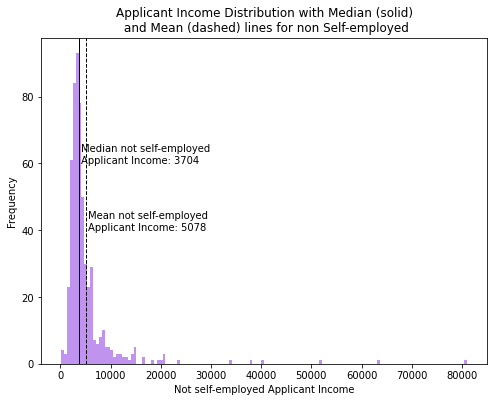

In [36]:
# analysis of income for NON self-employed applicants

df_self_not_employed = df.loc[df["Self_Employed"]==0]

x = df_self_not_employed['ApplicantIncome']

plt.rcParams["figure.figsize"] = (8,6)

result = plt.hist(x, bins='auto', color='#b887ed', alpha=0.9)

plt.axvline(x.mean(), color='k', linestyle='dashed',linewidth=1, label=x.mean())
plt.axvline(x.median(), color='k', linestyle='solid',linewidth=1, label=x.median())
plt.title("Applicant Income Distribution with Median (solid)\n and Mean (dashed) lines for non Self-employed")
plt.xlabel("Not self-employed Applicant Income")
plt.ylabel("Frequency")
plt.text(x.mean()*1.1, 40, 'Mean not self-employed\nApplicant Income: {:.0f}'.format(x.mean()))
plt.text(x.median()*1.1, 60, 'Median not self-employed\nApplicant Income: {:.0f}'.format(x.median()))
plt.show()

And as expected, most of the outliers in "Applicant Income" come from non self-employed applicants.

Let's repeat the same exercise for other variables such as Graduates.

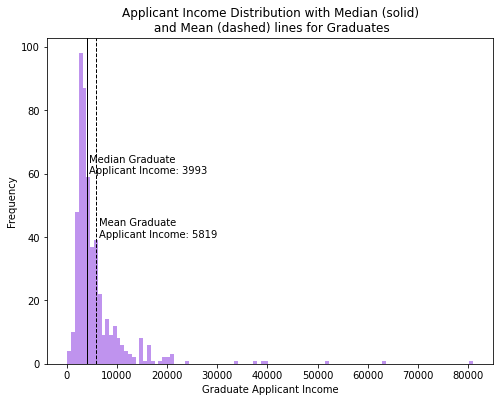

In [37]:
# analysis of income for self-employed applicants

df_graduate = df.loc[df["Graduate"]==1]

x = df_graduate['ApplicantIncome']

plt.rcParams["figure.figsize"] = (8,6)

result = plt.hist(x, bins='auto', color='#b887ed', alpha=0.9)

plt.axvline(x.mean(), color='k', linestyle='dashed',linewidth=1, label=x.mean())
plt.axvline(x.median(), color='k', linestyle='solid',linewidth=1, label=x.median())
plt.title("Applicant Income Distribution with Median (solid)\n and Mean (dashed) lines for Graduates")
plt.xlabel("Graduate Applicant Income")
plt.ylabel("Frequency")
plt.text(x.mean()*1.1, 40, 'Mean Graduate\nApplicant Income: {:.0f}'.format(x.mean()))
plt.text(x.median()*1.1, 60, 'Median Graduate\nApplicant Income: {:.0f}'.format(x.median()))
plt.show()

In order to run unbiased machine learning algorithms it is important to understand the characteristics of the data set in use. The author wouldn't want to skew the results of the algorithm by including any type of bias in the resulting classification algorithm. To that end I'd like to understand if there are any significant differences in the loan approval rates between female and male applicants. 

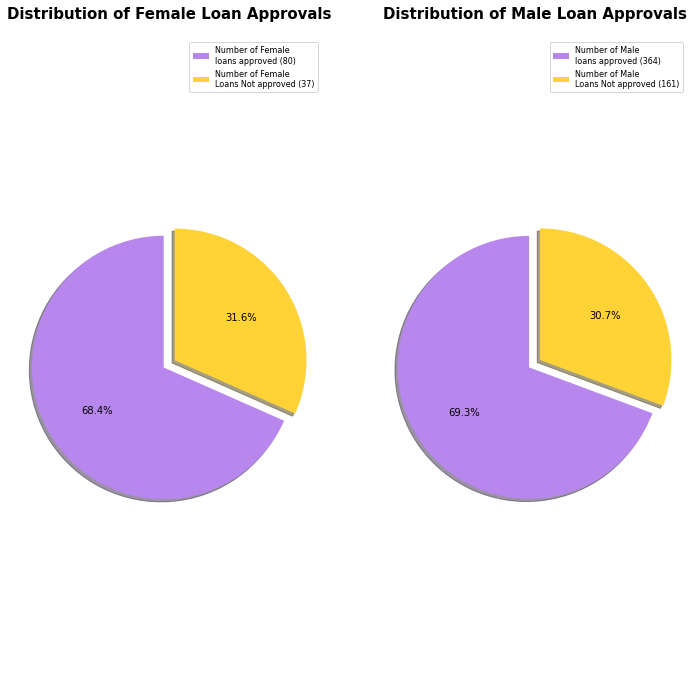

In [38]:
# stats of loan approvals by gender

females_approved = sum(1 for i, j in zip(df['Gender'], df["Loan_Status"]) if i == 2 and j == "Y")

females_not_approved = sum(1 for i, j in zip(df['Gender'], df["Loan_Status"]) if i == 2 and j == "N")

males_approved = sum(1 for i, j in zip(df['Gender'], df["Loan_Status"]) if i == 1 and j == "Y")

males_not_approved = sum(1 for i, j in zip(df['Gender'], df["Loan_Status"]) if i == 1 and j == "N")

# Display 2 pie plots side by side

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,12))

# Create a pieplot for females

values=[females_approved, females_not_approved]
labels = "Number of Female\nloans approved ("+str(females_approved)+")","Number of Female\nLoans Not approved ("+str(females_not_approved)+")"
explode = (0, 0.1) # only explode the 2nd slice "No Approved"
colors = ['#b887ed', '#ffd335']

ax1.pie(values, explode=explode, colors=colors,
        shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size':'medium', 'color' : 'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Distribution of Female Loan Approvals', fontsize=15, color='black', weight='bold', pad=20)
ax1.legend(labels, loc='best', prop={'size': 8})
ax1.axis('equal')

# Create a pieplot for males

values=[males_approved, males_not_approved]
labels = "Number of Male\nloans approved ("+str(males_approved)+")","Number of Male\nLoans Not approved ("+str(males_not_approved)+")"
explode = (0, 0.1) # only explode the 2nd slice "No Approved"
colors = ['#b887ed', '#ffd335']

ax2.pie(values, explode=explode, colors=colors,
        shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size':'medium', 'color' : 'black'})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Distribution of Male Loan Approvals', fontsize=15, color='black', weight='bold', pad=20)
ax2.legend(labels, loc='best', prop={'size': 8})
ax2.axis('equal')

plt.show()

It looks like there's less than 1% difference between the loan approval rates for Females and Males. The author considers that this allows us to feed this variable to the classification algorithms we're going to run later on.

Let's repeat the same exercise for other variables such as "Graduate".

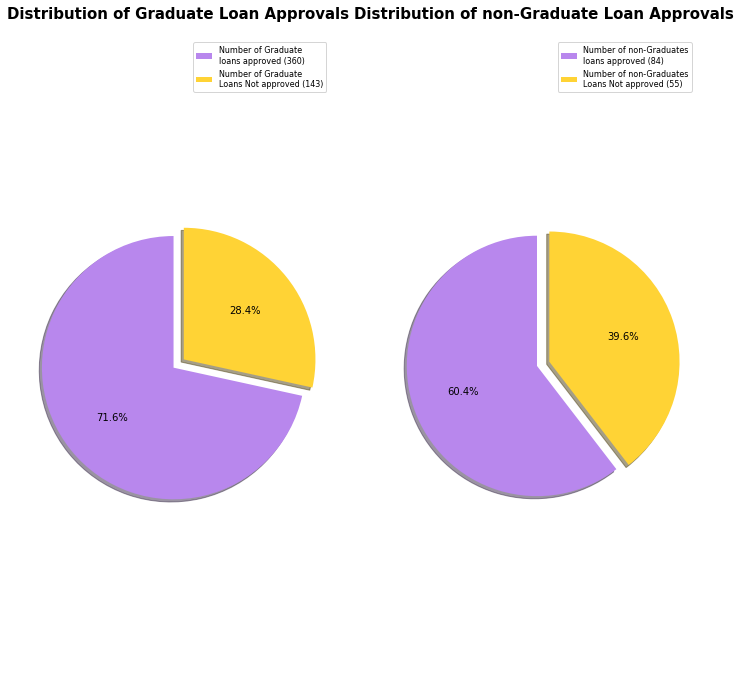

In [39]:
# stats of loan approvals by Graduate status

graduates_approved = sum(1 for i, j in zip(df['Graduate'], df["Loan_Status"]) if i == 1 and j == "Y")

graduates_not_approved = sum(1 for i, j in zip(df['Graduate'], df["Loan_Status"]) if i == 1 and j == "N")

non_graduates_approved = sum(1 for i, j in zip(df['Graduate'], df["Loan_Status"]) if i == 0 and j == "Y")

non_graduates_not_approved = sum(1 for i, j in zip(df['Graduate'], df["Loan_Status"]) if i == 0 and j == "N")

# Display 2 pie plots side by side

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,12))

# Create a pieplot for graduates

values=[graduates_approved, graduates_not_approved]
labels = "Number of Graduate\nloans approved ("+str(graduates_approved)+")","Number of Graduate\nLoans Not approved ("+str(graduates_not_approved)+")"
explode = (0, 0.1) # only explode the 2nd slice "No Approved"
colors = ['#b887ed', '#ffd335']

ax1.pie(values, explode=explode, colors=colors,
        shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size':'medium', 'color' : 'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Distribution of Graduate Loan Approvals', fontsize=15, color='black', weight='bold', pad=20)
ax1.legend(labels, loc='best', prop={'size': 8})
ax1.axis('equal')

# Create a pieplot for males

values=[non_graduates_approved, non_graduates_not_approved]
labels = "Number of non-Graduates\nloans approved ("+str(non_graduates_approved)+")","Number of non-Graduates\nLoans Not approved ("+str(non_graduates_not_approved)+")"
explode = (0, 0.1) # only explode the 2nd slice "No Approved"
colors = ['#b887ed', '#ffd335']

ax2.pie(values, explode=explode, colors=colors,
        shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size':'medium', 'color' : 'black'})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Distribution of non-Graduate Loan Approvals', fontsize=15, color='black', weight='bold', pad=20)
ax2.legend(labels, loc='best', prop={'size': 8})
ax2.axis('equal')

plt.show()

There's a significant difference in the approval rates for graduates and non-graduates so it will be important take this variable into account when we run the classification algorithm.

Let's repeat the same excercise for "Credit History".

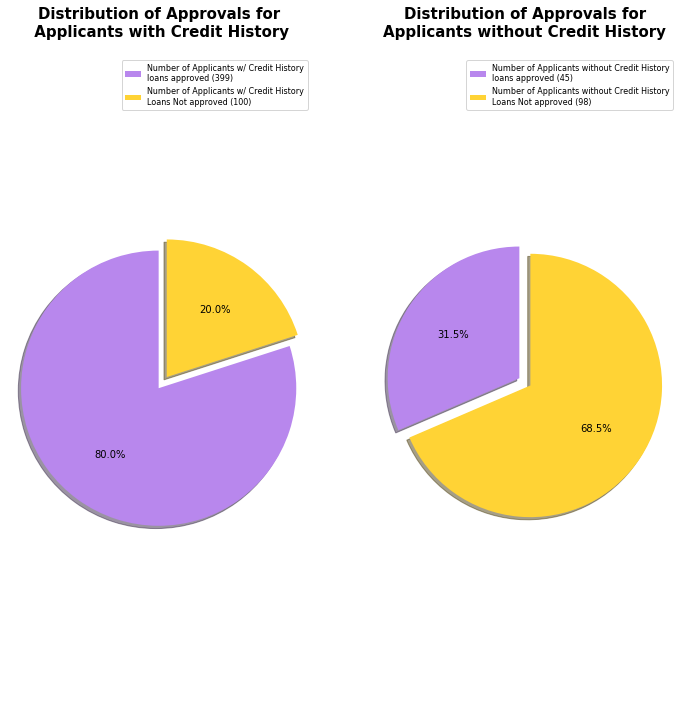

In [40]:
# stats of loan approvals by Credit History

credithistory_approved = sum(1 for i, j in zip(df['Credit_History'], df["Loan_Status"]) if i == 1 and j == "Y")

credithistory_not_approved = sum(1 for i, j in zip(df['Credit_History'], df["Loan_Status"]) if i == 1 and j == "N")

no_credithistory_approved = sum(1 for i, j in zip(df['Credit_History'], df["Loan_Status"]) if i == 0 and j == "Y")

no_credithistory_not_approved = sum(1 for i, j in zip(df['Credit_History'], df["Loan_Status"]) if i == 0 and j == "N")

# Display 2 pie plots side by side

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,12))

# Create a pieplot for applicants with credit history

values=[credithistory_approved, credithistory_not_approved]
labels = "Number of Applicants w/ Credit History\nloans approved ("+str(credithistory_approved)+")","Number of Applicants w/ Credit History\nLoans Not approved ("+str(credithistory_not_approved)+")"
explode = (0, 0.1) # only explode the 2nd slice "No Approved"
colors = ['#b887ed', '#ffd335']

ax1.pie(values, explode=explode, colors=colors,
        shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size':'medium', 'color' : 'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Distribution of Approvals for\n Applicants with Credit History', fontsize=15, color='black', weight='bold', pad=20)
ax1.legend(labels, loc='best', prop={'size': 8})
ax1.axis('equal')

# Create a pieplot for males

values=[no_credithistory_approved, no_credithistory_not_approved]
labels = "Number of Applicants without Credit History\nloans approved ("+str(no_credithistory_approved)+")","Number of Applicants without Credit History\nLoans Not approved ("+str(no_credithistory_not_approved)+")"
explode = (0, 0.1) # only explode the 2nd slice "No Approved"
colors = ['#b887ed', '#ffd335']

ax2.pie(values, explode=explode, colors=colors,
        shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size':'medium', 'color' : 'black'})
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Distribution of Approvals for\nApplicants without Credit History', fontsize=15, color='black', weight='bold', pad=20)
ax2.legend(labels, loc='best', prop={'size': 8})
ax2.axis('equal')

plt.show()

"Credit History" does show a very significant difference in approval rates between those who have one and those who don't.

Lastly let's look at approval rates by "Property Area".

In [41]:
# stats of loan approvals by property area

urban_approved = sum(1 for i, j in zip(df['Property_Area'], df["Loan_Status"]) if i == 1 and j == "Y")
urban_not_approved = sum(1 for i, j in zip(df['Property_Area'], df["Loan_Status"]) if i == 1 and j == "N")
semiurban_approved = sum(1 for i, j in zip(df['Property_Area'], df["Loan_Status"]) if i == 2 and j == "Y")
semiurban_not_approved = sum(1 for i, j in zip(df['Property_Area'], df["Loan_Status"]) if i == 2 and j == "N")
rural_approved = sum(1 for i, j in zip(df['Property_Area'], df["Loan_Status"]) if i == 3 and j == "Y")
rural_not_approved = sum(1 for i, j in zip(df['Property_Area'], df["Loan_Status"]) if i == 3 and j == "N")

urban_approval_rate = urban_approved/(urban_approved+urban_not_approved)*100
semiurban_approval_rate = semiurban_approved/(semiurban_approved+semiurban_not_approved)*100
rural_approval_rate = rural_approved/(rural_approved+rural_not_approved)*100

print("Percentage of loan approvals in Urban areas is "+str("%.0f%%"%urban_approval_rate))
print("Percentage of loan approvals in Semi-Urban areas is "+str("%.0f%%"%semiurban_approval_rate))
print("Percentage of loan approvals in Rural areas is "+str("%.0f%%"%rural_approval_rate))

Percentage of loan approvals in Urban areas is 66%
Percentage of loan approvals in Semi-Urban areas is 77%
Percentage of loan approvals in Rural areas is 63%


# Simple Prediction for Future Loan Applications

In this section we're going use a few classification algorithms to help automate the process of Loan Approvals. To do this we're going to rely mostly on the Scikit-Learn library which has many built-in algorithms and tools to aide in the data preprocessing and the evaluation of the results.

Before we start training the classification algorithms let's define the Independent and Target variables, encode the target variable "Loan_Status" into a numerical value and split the data into train and test buckets.

In [42]:
# first define the independent variables and target variable

X = df[['Gender','Married', 'Self_Employed', 'Graduate', 'Credit_History', 'Property_Area']]
y = df['Loan_Status']

In [43]:
# encode target variable so that it's a number.

from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y.astype('str'))

In [44]:
# split data into test and train sets, test set is going to be 20%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

At this point we're ready to import the different classifiers we're going to use to automate the process of loan approval. As previously mentioned, we're going to use Scikit-learn for this.

In [47]:
# import models that we're going to use

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

We're going to create a dictionary with the name of each algorithm and its classifier. This will allow the author and future data scientists working on this project to add or remove algorithms and be able to compare the performance without changing much code. 

Once we've created the "classifiers" dictionary we're going to loop through it and train each of the classifiers with the training data.

In [48]:
# create a "classifiers" dictionary and loop through it to train each of the classifiers within

classifiers = {"Decision Tree": DecisionTreeClassifier(),
               "Random Forest": RandomForestClassifier(),
               "Logistic Regression":LogisticRegression(),
               "Gradient Boosting Classifier": GradientBoostingClassifier(),
               "KNeighbors" : KNeighborsClassifier(),
               "Support Vector Machines": SVC()}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

Now that we've trained the different algorithms we can visualize the first results. We will import skickit-learn's ConfusionMatrixDisplay to look at the True Negatives, False Negatives, True Positives and False Positives by algorithm.

To do that with less code we're going to run a for loop through the values in the "classifiers" dictionary (the regressors) and create a confusion matrix for each of them. We're going to display all the matrices in one row to make it easier to compare and we're going to have as many columns as the number of algorithms in the "classifiers" dictionary.

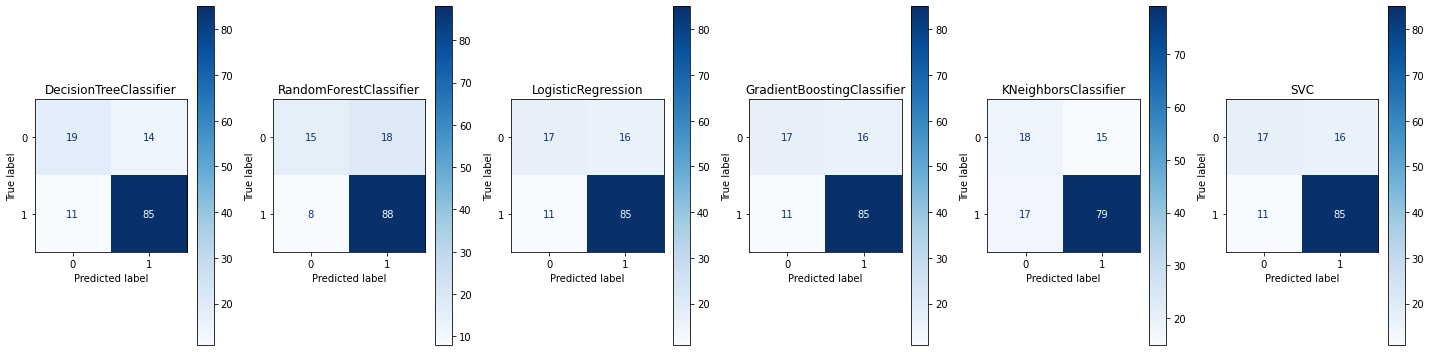

In [49]:
# create subplot and iterate over the classifiers and axes

from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=len(classifiers.keys()), figsize=(20,5))

for classifier, ax in zip(classifiers.values(), axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(classifier, 
                                          X_test, 
                                          y_test, 
                                          ax=ax, 
                                          cmap='Blues')
    ax.title.set_text(type(classifier).__name__)
plt.tight_layout()  
plt.show()

We can already see that some algorithms are very good at classifying "loans approved" as "approved" but at the same time have more difficulty classifying "loands not approved" as "not approved". 

To have a better sense of the performance of each algorithm, let's look at more specific performance metrics for classification algorithms. We're going to import them from sklearn.metrics.

Again, to optimize time and code we're going to rely on for loops to first build a list of predictions from each algorithm. Once we have the list of predictions we're going to calculate the F1 Score, Recall Score, Precision Score, Accuracy Score and ROC AUC Score for each prediction (for each algoritm). Lastly we're going to build a new dataframe with the scores of each algorithm.

In [52]:
# calculate recall, precision, accuracy, F-score, ROC

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

predictions = list()

for classifier in classifiers.values():
    p = classifier.predict(X_test)
    predictions.append(p)

results_df = pd.DataFrame(index=['F1', 'Recall', 'Precision', 'Accuracy Score', 'ROC AUC'],columns=classifiers.keys())

for key, prediction in zip(classifiers.keys(), predictions):
    f1 = round(f1_score(y_test,prediction),3)
    recall = round(recall_score(y_test,prediction),3)
    precision = round(precision_score(y_test,prediction),3)
    accuracy = round(accuracy_score(y_test,prediction),3)
    rocauc = round(roc_auc_score(y_test,prediction),3)
    results_df[key] = ([f1, recall, precision, accuracy, rocauc])

results_df.head()



,Decision Tree,Random Forest,Logistic Regression,Gradient Boosting Classifier,Kneighbors,Support Vector Machines
F1,0.872,0.871,0.863,0.863,0.832,0.863
Recall,0.885,0.917,0.885,0.885,0.823,0.885
Precision,0.859,0.830,0.842,0.842,0.840,0.842
Accuracy Score,0.806,0.798,0.791,0.791,0.752,0.791
ROC AUC,0.731,0.686,0.700,0.700,0.684,0.700


To help visualize the scores we're going to use a heatmap. To do so we're going to import seaborn and feed the heatmap with the dataframe of scores we've created.

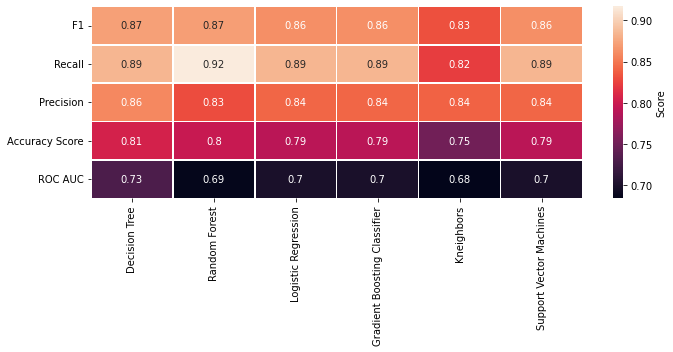

In [53]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.heatmap(results_df,
                 annot=True,
                 linewidths=.5,
                 cbar_kws={"label":"Score"})

plt.tight_layout()  
plt.show()

The results show the different performance of each classification algorithm. Some algorithms such as "Random Forest" are very good at classifying "approved loans" as approved (have a high "Recall Score") but then are poorer than the rest when it comes to classifying "loans not approved" as "not approved" (have a lower "Precision Score"). Continuing with "Random Forest" as an example, this high "Recall Score" and lower "Precision Score" is then reflected in the "Accuracy Score" which measures the % of correct prediction across all the classes. 

But in order to better compare models with high or low "Recall Score" and "Precision Score" we can use the "F1 Score". The "F1 Score" uses the "harmonic mean" of the "Recall Score" and "Precision Score" and summarises them in one number. Even though the "Random Forest" algorithm has the highest "Recall Score", it has a lower F1 score than other algorithms such as "Decision Tree".

Finally we can look at the ROC AUC score which combines the "True Positive Rate" (TPR) and "False Positive Rate" (FPR). A model that classifies all the observations correctly would have ROC AUC Score of 1, therefore the closer the ROC AUC Score to 1 the better. 

Looking at both "F1 Score" and "ROC AUC Score" we can determine that "Decision Tree" is the best performing algorithm in this case.

